In [25]:
import random
import numpy as np
import math
from sphere_fit import fit_sphere
import matplotlib.pyplot as plt
import math

In [26]:
def generate_sphere_points(noise =0.0):
    #generate random center point (x0, y0, z0) within [0, 500]
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)
    
    # Randomly select a pointer radius r between 20 and 100
    r = random.uniform(20, 100)
    
    # Randomly select an number of measurements n between 4 and 20
    n = random.randint(4, 20)
    
    # Generate n random points on the surface of the sphere
    points = []
    for _ in range(n):
        # Generate random spherical coordinates
        theta = random.uniform(0, 2 * math.pi)       # Angle around the z-axis
        phi = math.acos(random.uniform(0, 1))       # Angle from the z-axis, pointer cannot be below the dimple

        # Convert spherical coordinates to Cartesian coordinates
        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [27]:
# Test data generation
points, r, x0, y0, z0 = generate_sphere_points(np.random.uniform(0, 5))

# Output the results
print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (350.38, 358.42, 104.75)
Radius: 24.01
Number of Points: 10
Points on the Sphere Surface:
(335.43, 341.44, 119.03)
(341.76, 355.03, 123.18)
(366.51, 350.88, 122.91)
(344.70, 378.78, 110.98)
(331.71, 367.00, 115.93)
(349.52, 341.89, 124.73)
(328.05, 348.33, 108.93)
(364.63, 366.90, 119.46)
(337.00, 357.76, 123.84)
(350.88, 333.93, 113.37)


In [28]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

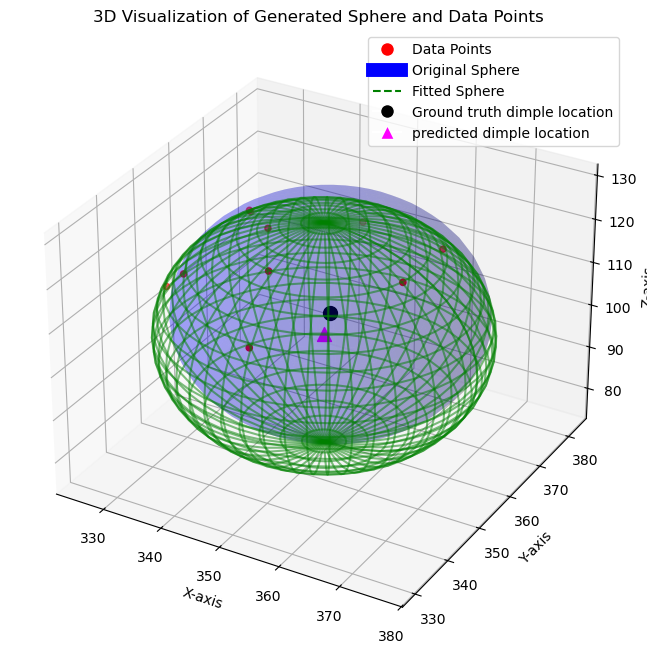

True Center: (350.3821, 358.4221, 104.7549)
True Radius: 24.0138

Estimated Center: (350.9201, 355.5484, 101.9943)
Estimated Radius: 25.5498
Sum of Squared Residuals: 1.2930e+01

Total Position Error: 4.0209
Total Radius Error: 1.5360


In [29]:
# Fit a sphere to the generated points
center, radius, residuals = fit_sphere(points)

# Prepare data for plotting
x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


# Create data for the original sphere surface
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)

# Plot the original sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

# Optionally, plot the fitted sphere
x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

# Set plot labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)

# Show the plot
plt.show()

# Print the estimated and true sphere parameters
print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [30]:
i = 0
avg_p_error = 0
avg_r_error = 0
while(i < 1000):
    i += 1
    # Generate test data
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    # Print predicted results
    center, radius, residual_sum = fit_sphere(points)

    p_error = total_pos_error(center, x0, y0, z0)
    r_error = total_radius_error(radius, r)

    avg_p_error += p_error
    avg_r_error += r_error

    print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
    print(f"True Radius: {r:.4f}")
    print(f"Estimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
    print(f"Estimated Radius: {radius:.4f}")

    print("Trial ", i, ":")
    print(f"Total Position Error: {p_error:.4f}")
    print(f"Total Radius Error: {r_error:.4f}\n")
    
print(f"Position Error: {avg_p_error:.4f}")
print(f"Radius Error: {avg_r_error:.4f}")
print(i)


print(f"Average Position Error: {avg_p_error/i:.4f}")
print(f"Average Radius Error: {avg_r_error/i:.4f}\n")


True Center: (142.5121, 38.6314, 479.3548)
True Radius: 93.4977
Estimated Center: (142.3723, 38.0965, 479.7241)
Estimated Radius: 93.3311
Trial  1 :
Total Position Error: 0.6649
Total Radius Error: 0.1665

True Center: (497.2410, 359.7309, 154.6601)
True Radius: 90.1325
Estimated Center: (497.3993, 360.4934, 153.7507)
Estimated Radius: 90.1205
Trial  2 :
Total Position Error: 1.1973
Total Radius Error: 0.0120

True Center: (308.1518, 212.4548, 455.1010)
True Radius: 35.6365
Estimated Center: (309.0103, 211.9074, 454.8632)
Estimated Radius: 35.7478
Trial  3 :
Total Position Error: 1.0455
Total Radius Error: 0.1113

True Center: (334.9484, 5.2656, 448.0382)
True Radius: 23.7004
Estimated Center: (334.0838, 5.1530, 444.9621)
Estimated Radius: 24.7082
Trial  4 :
Total Position Error: 3.1973
Total Radius Error: 1.0077

True Center: (9.0714, 361.9675, 189.6979)
True Radius: 88.1397
Estimated Center: (12.3818, 361.1378, 193.8189)
Estimated Radius: 85.3412
Trial  5 :
Total Position Error: 5.35